In [77]:
import pandas as pd
import matplotlib.pyplot as plt

pit_stops = pd.read_csv('cleaned_pit_stops.csv')
races = pd.read_csv('cleaned_races.csv')
results = pd.read_csv('cleaned_results.csv')
constructors = pd.read_csv('cleaned_constructors.csv')
constructor_standings = pd.read_csv('cleaned_constructor_standings.csv')

In [78]:
pit_stops['seconds'] = pit_stops['milliseconds'] / 1000

pit_stops = pd.merge(pit_stops, races[['raceId', 'year']], on='raceId')

pit_stops = pd.merge(
    pit_stops,
    results[['raceId', 'driverId', 'constructorId']],
    on = ['raceId', 'driverId']
)

In [79]:
pit_stops = pit_stops[pit_stops['seconds'] < 40]
average_pit_times = pit_stops.groupby(['year', 'constructorId'])['seconds'].mean().reset_index()

average_pit_times = pd.merge(
    average_pit_times,
    constructors[['constructorId', 'constructor_name']],
    on = 'constructorId'
)

In [80]:
final_races = races.groupby('year')['raceId'].max().reset_index()
final_constructor_standings = pd.merge(constructor_standings, final_races, on='raceId')

In [81]:
combined_data = pd.merge(
    average_pit_times,
    final_constructor_standings[['year', 'constructorId', 'position']],
    on = ['year', 'constructorId']
)

modern_data = combined_data[combined_data['year'] >= 2019].copy()
top_teams = modern_data['constructor_name'].value_counts().head(5).index.tolist()
modern_data = modern_data[modern_data['constructor_name'].isin(top_teams)]

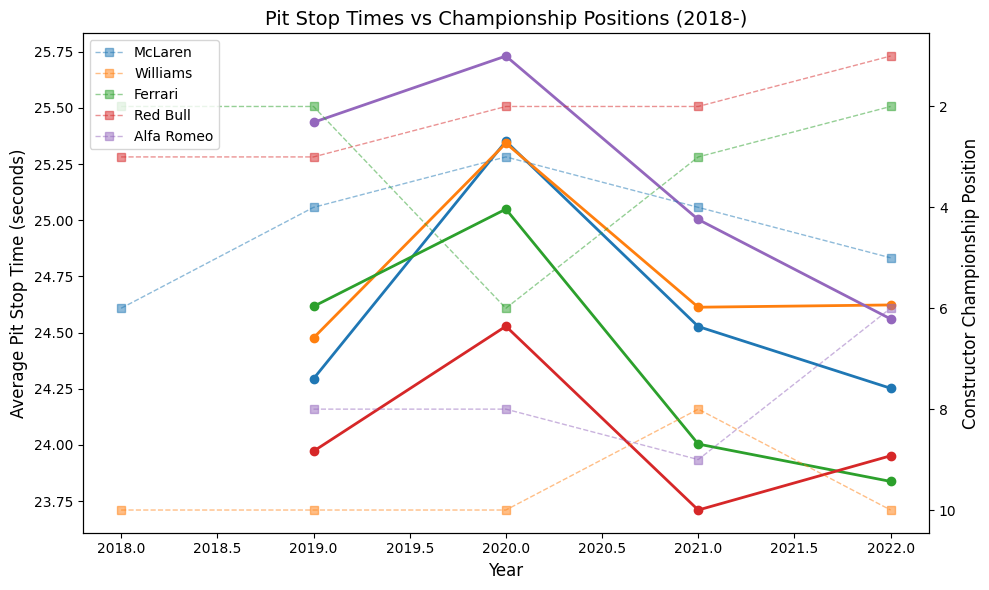

In [82]:
plt.figure(figsize=(10, 6))

for team in top_teams:
    team_data = modern_data[modern_data['constructor_name'] == team].sort_values('year')
    plt.plot(
        team_data['year'],
        team_data['seconds'],
        'o-',
        linewidth = 2,
        label = f"{team}"
    )

plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Pit Stop Time (seconds)', fontsize=12)

second_plot = plt.gca().twinx()
for team in top_teams:
    team_data = recent_data[recent_data['constructor_name'] == team].sort_values('year')
    second_plot.plot(
        team_data['year'],
        team_data['position'],
        's--',
        linewidth=1,
        alpha=0.5,
        label= team
    )

second_plot.invert_yaxis()

second_plot.set_ylabel('Constructor Championship Position', fontsize=12)
plt.title('Pit Stop Times vs Championship Positions (2018-)', fontsize=14)
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()